# Acoustic levitation in cold room

Acquisition of video of a levitated droplet with a Chronos high speed camera. Manual stop recording after freezing of droplet. Big droplet, pure water, feezed at -16 °C.

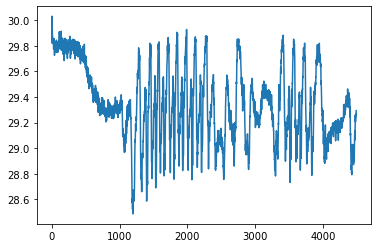

In [11]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.signal as sig

def applyROI(im, roi):
    imCrop = im[roi[1]:roi[1]+roi[3], roi[0]:roi[0]+roi[2]]
    return imCrop

def butter_lowpass_filter(cutoff, fs, order):
    nyq = 0.5 * fs  # Nyquist Frequency
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = sig.butter(order, normal_cutoff, btype='low', analog=False)    
    return a, b

fromCenter = False

vidcap = cv2.VideoCapture('C:\\Users\\j05625pe\\Documents\\Work\\ExperimentalColdRoom\\vid_2021-03-04_16-13-22.mp4')
if not vidcap.isOpened():
    assert(False)
length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
avg = np.zeros(length)
success, image = vidcap.read()

r = cv2.selectROI('select', image, fromCenter)   # Press ENTER after selecting ROI
cv2.destroyWindow('select')

# Filter specs
fs = 1057       # sample rate, Hz
cutoff = 200      # desired cutoff frequency of the filter, Hz
order = 2       # sin wave can be approx represented as quadratic
Tduration = length/fs

count = 0
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    avg[count] = np.mean(applyROI(image, r))
    success, image = vidcap.read()  
    count += 1
vidcap.release()

a, b = butter_lowpass_filter(cutoff, fs, order)
avg_filt = sig.filtfilt(b, a, avg)
plt.plot(avg_filt)

In [2]:
pwd

'C:\\Users\\j05625pe\\Documents\\Python Scripts'